# Data Transformation using Python Pandas

### Import dependencies

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
# Display all columns (pandas will collapse some columns if we don't set this option)
pd.set_option('display.max_columns', None)

### Import files

In [3]:
nationals_df = pd.read_csv("2019_washington_nationals")
astros_df = pd.read_csv("2019_houston_astros")

In [4]:
astros_df

,Rk,Pos,Name,Age,G,PA,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,BA,OBP,SLG,OPS,OPS+,TB,GDP,HBP,SH,SF,IBB
0,1,C,Robinson Chirinos,35,114,437,366,57,87,22,1,17,58,1,2,51,125,.238,.347,.443,.790,105,162,11,13,2,5,1
1,2,1B,Yuli Gurriel,35,144,612,564,85,168,40,2,31,104,5,3,37,65,.298,.343,.541,.884,126,305,12,5,0,6,2
2,3,2B,Jose Altuve,29,124,548,500,89,149,27,3,31,74,6,5,41,82,.298,.353,.550,.903,131,275,19,3,1,3,0
3,4,SS,Carlos Correa,24,75,321,280,42,78,16,1,21,59,1,0,35,75,.279,.358,.568,.926,137,159,8,2,0,4,0
4,5,3B,Alex Bregman,25,156,690,554,122,164,37,2,41,112,5,1,119,83,.296,.423,.592,1.015,162,328,9,9,0,8,2
5,6,LF,Michael Brantley*,32,148,637,575,88,179,40,2,22,90,3,2,51,66,.311,.372,.503,.875,126,289,21,7,0,4,3
6,7,CF,Jake Marisnick,28,120,318,292,46,68,16,3,10,34,10,3,17,95,.233,.289,.411,.700,80,120,6,6,3,0,0
7,8,RF,Josh Reddick*,32,141,550,501,57,138,19,3,14,56,5,2,36,66,.275,.319,.409,.728,89,205,9,0,1,9,1
8,9,DH,Yordan Alvarez*,22,87,369,313,58,98,26,0,27,78,0,0,52,94,.313,.412,.655,1.067,173,205,9,2,0,2,4
9,Rk,Pos,Name,Age,G,PA,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,BA,OBP,SLG,OPS,OPS+,TB,GDP,HBP,SH,SF,IBB


### Data Cleaning

In [5]:
# Omit rows that contain calculated fields, header rows embedded, 
# or have missing values in more than 50% of their columns. 
# Expecially the Home run Column 'HR '
# Rows have been identified by inspected the dataframe
nationals = nationals_df.drop([8,22,52,53,54,55,56])
astros = astros_df.drop([9, 22, 29, 30, 33, 35, 40, 41, 42, 44, 45, 47, 48, 49, 50, 51])

### Relabel columns for readibility

#### Step 1: Create a dictionary the key is the original name, and the value is the new name

In [6]:
col_names = {"Rk":"Rank", "Pos":"Position","G":"Games_Played", "PA":"Plate_Apperance", "AB":"At_Bat", "R":"Runs", "H":"Hits", "SB":"Stolen_Bases","CS":"Caugt_Stealing","BB":"Base_Balls", "SO":"Strike_Outs","BA":"Hits_at_Bat", "TB":"Total_Bases", "HBP":"Hits_by_Pitch"}

#### Step 2: use the rename method and the dictionary name to assign the new column names to the dataframe

In [7]:
nationals = nationals.rename(columns=col_names)
astros = astros.rename(columns=col_names)

### Data Exploration

In [8]:
# Inspect data types for each column in both dataframes using the .dtypes method
# Combines dtypes information for each dataframe into a single table for comparison
nat_dtypes = nationals.dtypes
ast_dtypes = astros.dtypes
# used pandas .concat() method to combine the dtype information
dtypes_df = pd.concat([nat_dtypes, ast_dtypes], axis=1)
dtypes_df.columns = ['Nationals', 'Astros']
dtypes_df

,Nationals,Astros
Rank,object,object
Position,object,object
Name,object,object
Age,object,object
Games_Played,object,object
Plate_Apperance,object,object
At_Bat,object,object
Runs,object,object
Hits,object,object
2B,object,object


#### Since we know that many of these columns should be numeric, and not objects, we will conduct a datatype conversion. This will reduce the memory of the tables and convert to the right data type for down stream applications.

### Memory Reduction

In [9]:
# Find memory usage with memory_usage method
nationals_mem = nationals.memory_usage(deep=True)
astros_mem = astros.memory_usage(deep=True)

In [10]:
# Display memory usage
print(nationals_mem, astros_mem)

Index               400
Rank               3013
Position           3181
Name               3502
Age                2950
Games_Played       3056
Plate_Apperance    3118
At_Bat             3132
Runs               3198
Hits               3180
2B                 3216
3B                 3300
HR                 3230
RBI                3204
Stolen_Bases       3272
Caugt_Stealing     3300
Base_Balls         3203
Strike_Outs        3145
Hits_at_Bat        2644
OBP                2644
SLG                2644
OPS                2645
OPS+               2614
Total_Bases        3177
GDP                3258
Hits_by_Pitch      3279
SH                 3300
SF                 3300
IBB                3300
dtype: int64 Index               288
Rank               2187
Position           2250
Name               2508
Age                2124
Games_Played       2237
Plate_Apperance    2243
At_Bat             2243
Runs               2258
Hits               2242
2B                 2292
3B                 2376
HR 

### Reduce memory usage by changing datatypes

In [11]:
# Convert columns that are categorical using astype method
nationals["Position"] = nationals["Position"].astype('category')
astros["Position"] = astros["Position"].astype('category')

#### Astype method only works on a single column, to change multiple columns in one code block, use a for loop.

#### Step1: Create lists of columns by the final data type

In [12]:
# These columns are categorical and strings
non_num_cols = ['Position','Name']

In [13]:
# These columns have missin values, and decimals
float_cols = ['Hits_at_Bat','OBP','SLG','OPS','OPS+']

In [14]:
# Combine all non integer columns into a single list
non_int_cols = non_num_cols + float_cols

In [15]:
# Use a list comprehension to generate a list of columns that contains integer values
# int_cols = ["Age","Base_Balls", "Games_Played", "Plate_Apperance","At_Bat","Runs","Hits","2B","Strike_Outs"]
nat_int_cols = [col for col in nationals.columns if col not in non_int_cols]
ast_int_cols = [col for col in astros.columns if col not in non_int_cols]

#### Step2: Use a for loop to change the data types of multiple columns

In [16]:
# Convert National's appropriate columns into integer
for col in nat_int_cols:
    nationals[col] = nationals[col].astype('int64')

In [17]:
# Convert Astros' appropriate columns into integer
for col in ast_int_cols:
    astros[col] = astros[col].astype('int64')

In [18]:
# Converts columns into floats
for col in float_cols:
    nationals[col] = nationals[col].astype('float')
    astros[col] = astros[col].astype('float')

In [19]:
# Confirm datatype changes
new_nat_dtypes = nationals.dtypes
new_ast_dtypes = astros.dtypes
datatypes_df = pd.concat([nat_dtypes, new_nat_dtypes, ast_dtypes, new_ast_dtypes], axis=1)
datatypes_df.columns = ['Nat Org dtype', 'Nat Upd dtype', 'Ast Org dtype', 'Ast Upd dtype']
datatypes_df

,Nat Org dtype,Nat Upd dtype,Ast Org dtype,Ast Upd dtype
Rank,object,int64,object,int64
Position,object,category,object,category
Name,object,object,object,object
Age,object,int64,object,int64
Games_Played,object,int64,object,int64
Plate_Apperance,object,int64,object,int64
At_Bat,object,int64,object,int64
Runs,object,int64,object,int64
Hits,object,int64,object,int64
2B,object,int64,object,int64


### Save updated records for memory reduction

In [20]:
updated_nationals_mem = nationals.memory_usage(deep=True)
updated_astros_mem = astros.memory_usage(deep=True)

#### Create a dataframe to compare memory reduction

In [21]:
# Create a dataframe using concat method
mem_df = pd.concat([nationals_mem, updated_nationals_mem, astros_mem, updated_astros_mem], axis=1)

In [22]:
# Labels columns
mem_df.columns = ['Nat Mem Pre', 'Nat Mem Post', 'Ast Mem Pre', 'Ast Mem Post']

In [23]:
# Create two new calculated columns, the absolute and the percent change
mem_df['Nat Absolute Change'] = mem_df['Nat Mem Post'] - mem_df['Nat Mem Pre']
mem_df["Nat Percent Change"] = ((mem_df['Nat Mem Pre'] - mem_df['Nat Mem Pre'])/mem_df['Nat Mem Pre'])
mem_df['Ast Absolute Change'] = mem_df['Ast Mem Post'] - mem_df['Ast Mem Pre']
mem_df["Ast Percent Change"] = ((mem_df['Ast Mem Pre'] - mem_df['Ast Mem Pre'])/mem_df['Ast Mem Pre'])

#### Style table for readability

In [24]:
# Function to change negative values to red
def color_negative_red(val):
    color = 'red' if val < 0 else 'black'
    return 'color: %s' % color

In [25]:
# Style column with negative values and percentage
format_dict = {'Percent Change':'{:.2%}'}

mem_df.style.format(format_dict).applymap(color_negative_red)

,Nat Mem Pre,Nat Mem Post,Ast Mem Pre,Ast Mem Post,Nat Absolute Change,Nat Percent Change,Ast Absolute Change,Ast Percent Change
Index,400,400,288,288,0,0,0,0
Rank,3013,400,2187,288,-2613,0,-1899,0
Position,3181,1092,2250,1457,-2089,0,-793,0
Name,3502,3502,2508,2508,0,0,0,0
Age,2950,400,2124,288,-2550,0,-1836,0
Games_Played,3056,400,2237,288,-2656,0,-1949,0
Plate_Apperance,3118,400,2243,288,-2718,0,-1955,0
At_Bat,3132,400,2243,288,-2732,0,-1955,0
Runs,3198,400,2258,288,-2798,0,-1970,0
Hits,3180,400,2242,288,-2780,0,-1954,0


### Visual Memory Reduction using a Bar Plot

#### Organize variables that will be used in the bar plot

### Nationals Data

In [26]:
# Labels: Prepare a list of column name labels
labels = list(nationals.columns.values)

# Data values
post_memory = list(updated_nationals_mem.values)
post_memory = post_memory[1:] #omits the index value because the labels list does not include "index"
pre_memory = list(nationals_mem.values)
pre_memory = pre_memory[1:] #omits the index value because the labels list does not include "index"

In [27]:
# Confirm that the number of labels and the number of values are equal
# Otherwise, the bar plots will not be generated
print (len(labels) == len(pre_memory),
len(labels) == len(post_memory))

True True


#### Label location and bar width

In [28]:
# the label locations
x = np.arange(len(labels))

# the width of the bars
width = 0.35  

#### Figure plot code

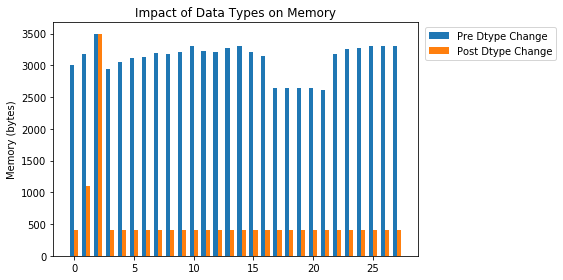

In [29]:
# Creates just a figure and only one subplot
fig, ax = plt.subplots()
# Code for the bars, one per group
rects1 = ax.bar(x - width/2, pre_memory, width, label='Pre Dtype Change') 
rects2 = ax.bar(x + width/2, post_memory, width, label='Post Dtype Change')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Memory (bytes)')
ax.set_title('Impact of Data Types on Memory')

# To set the legend box outside of the plot
chartBox = ax.get_position()
ax.set_position([chartBox.x0, chartBox.y0, chartBox.width*0.6, chartBox.height])
# bboxbbox_to_anchor anchors legend box, bboxbbox_to_anchor(x, y)
ax.legend(loc='upper center', bbox_to_anchor=(1.2, 1), shadow=False, ncol=1)

fig.tight_layout()
plt.show()

### Astros Data

In [30]:
# Labels: Prepare a list of column name labels
labels = list(astros.columns.values)

# Data values
post_memory = list(updated_astros_mem.values)
post_memory = post_memory[1:] #omits the index value because the labels list does not include "index"
pre_memory = list(astros_mem.values)
pre_memory = pre_memory[1:] #omits the index value because the labels list does not include "index"

In [31]:
# Confirm that the number of labels and the number of values are equal
# Otherwise, the bar plots will not be generated
print (len(labels) == len(pre_memory),
len(labels) == len(post_memory))

True True


#### Label location and bar width

In [32]:
# the label locations
x = np.arange(len(labels))

# the width of the bars
width = 0.35  

#### Figure plot code

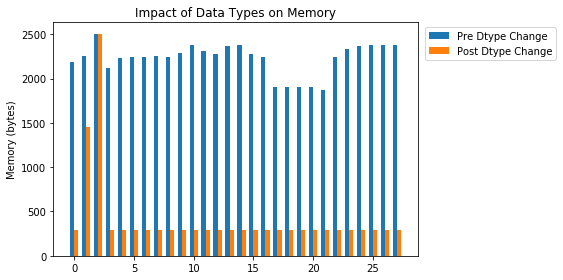

In [33]:
# Creates just a figure and only one subplot
fig, ax = plt.subplots()
# Code for the bars, one per group
rects1 = ax.bar(x - width/2, pre_memory, width, label='Pre Dtype Change') 
rects2 = ax.bar(x + width/2, post_memory, width, label='Post Dtype Change')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Memory (bytes)')
ax.set_title('Impact of Data Types on Memory')

# To set the legend box outside of the plot
chartBox = ax.get_position()
ax.set_position([chartBox.x0, chartBox.y0, chartBox.width*0.6, chartBox.height])
# bboxbbox_to_anchor anchors legend box, bboxbbox_to_anchor(x, y)
ax.legend(loc='upper center', bbox_to_anchor=(1.2, 1), shadow=False, ncol=1)

fig.tight_layout()
plt.show()

### Make dataframes available in other notebooks

In [34]:
nationals = nationals
%store nationals
del nationals

Stored 'nationals' (DataFrame)


In [35]:
astros = astros
%store astros
del astros

Stored 'astros' (DataFrame)


In [36]:
astros

NameError: name 'astros' is not defined